<style>
div.blue{
    background-color:#e6f0ff; 
    border-radius: 5px; 
    padding: 20px;}
</style> 

<style>
div.warn {    
    background-color: #fcf2f2;
    border-color: #dFb5b4;
    border-left: 5px solid #dfb5b4;
    padding: 0.5em;
    }
 </style>
    
<h1 style="text-align: center; color: purple;" markdown="1">Amazon Rekognition Emotion Detection with Face Covered </h1>
<h2 style="text-align: center; color: purple;" markdown="1">QTM350 Project by Quattro Formaggi </h2>

<img align="middle" src="https://350-project-notebook.s3.amazonaws.com/1.png" width=500 height=500/>

## Motivations
Face masks have recently become a symbol of the global effort to slow the spread of COVID-19. Although putting on a mask over your nose and mouth is one of the easiest ways to protect yourself and others from Coronavirus, face masks may be subtly (and not so subtly) interfering with how we perceive and recognize one another when the lower part of our faces are hidden behind the cloth.   

Fortunately, according to a [CNN post](https://edition.cnn.com/2020/06/15/health/masks-detecting-emotions-wellness-scn/index.html), masks do not necessarily hide our emotions, because we express our feelings in many different ways that don't rely on the lower part of our faces. Most people are good at detecting a range of different emotions in the eyes and the upper face, even if they don't realize it.

In fact, a widely used assessment was developed in the 1990s to help assess autism by British psychologist Simon Baron-Cohen showed that most people can recognize even subtle mental states like pensiveness just by looking at the changes in expression in eyes.  



## Project Focus
While human beings might be able to detect emotions behind the mask, our group are curious about whether the machine could master this job, and we decided to use **Amazon Rekognition** in this project. Along the way, we developed several specific questions that we want to answer: 
> Can AWS Rekognition detect emotions accurately when the face in an image is covered with a mask? 

> Does the accuracy of Rekognition change when the eyes are covered instead of the lower part of the face?

> Do humans detect emotions better than the machine?


## Hypothesis
After doing a short test run using a set of pictures of our group member, we found that Amazon Rekognition is less arrcurate when the mask is on. Therefore, we expect that AWS Rekognition will have a lower accuracy when a face is covered with a mask. Also, we expect the accuracy to change when the upper half of the face is covered compared to the situation that the lower half of the face is covered since AWS Rekognition may generate the results depending more on the movement of the mounth. Moreover, we expect human will outperform the AWS Rekognition based on the calims make in the newsarticle.

## Architecture Overview
Here is an architecture diagram based on our project.

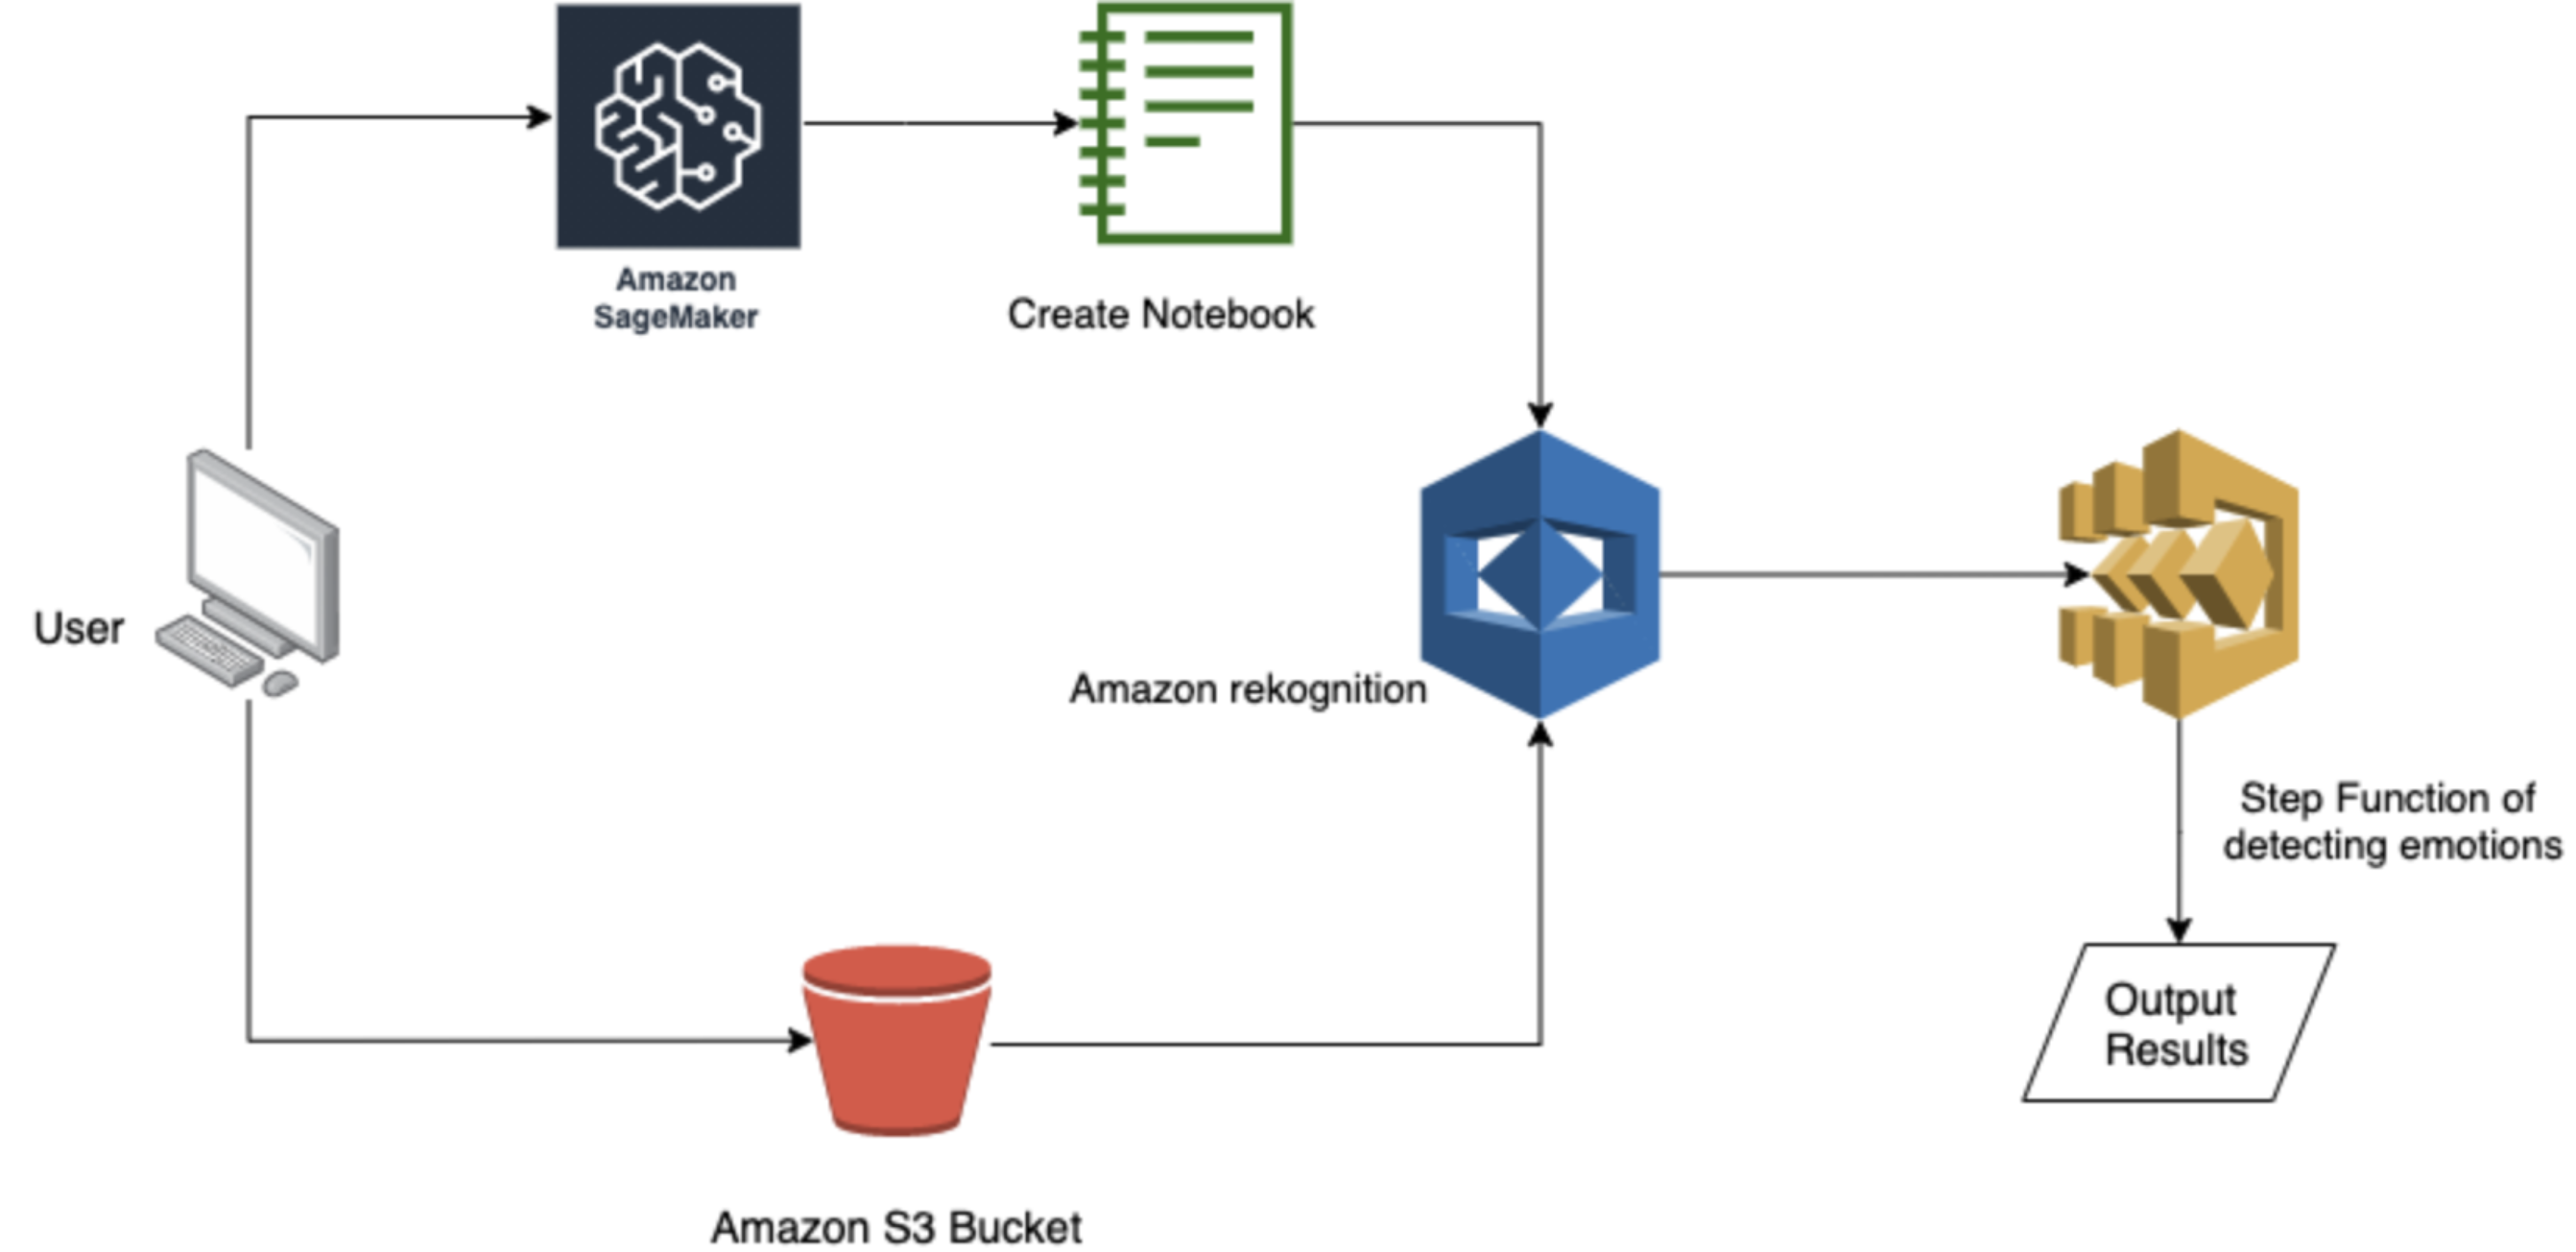

In this workflow, the pictures are sent to Amazon S3 Bucket and a jupyter notebook is hosted on Amazon SageMaker. We can access the images directly by calling the items in the S3 Bucket. Then the machine learning service Rekognition can be called using Python SDK or AWS CLI. Then the pictures are analyzed with the step functions of detecting emotions and the output results could be viewd in the notebook.

## Testing using Rekognition with different emotions
The valid values for Rekognition emotions identification are: **HAPPY | SAD | ANGRY | CONFUSED | DISGUSTED | SURPRISED | CALM | UNKNOWN | FEAR**. We tested each emotion (except for CALM and UNKNOWN) with a set of images of the same person not wearing anything (the control group, which must be identified correctly), wearing a mask, and wearing sunglasses. In the latter two situations, the machine can only examine the eyes or the lower part of the face. 
The images below are from [science people](https://www.scienceofpeople.com/masks/) and [freepik]( https://www.freepik.com/).


In [1]:
import boto3
client = boto3.client('rekognition')

#### Happy
<img align="left" src="https://350-project-notebook.s3.amazonaws.com/V-happiness_Moment.jpg" width=335 height=150/><img align="left" src="https://350-project-notebook.s3.amazonaws.com/happiness.jpg" width=250 height=250/><img align="left" src="https://350-project-notebook.s3.amazonaws.com/happiness_sunglass.jpg" width=250 height=250/>

In [2]:
happy = client.detect_faces(Image = {'S3Object':{'Bucket':'350-project-notebook', 'Name':'V-happiness_Moment.jpg'}},
                    Attributes = ["ALL"])
happy['FaceDetails'][0]['Emotions']

[{'Type': 'HAPPY', 'Confidence': 99.7886962890625},
 {'Type': 'SURPRISED', 'Confidence': 0.12495368719100952},
 {'Type': 'FEAR', 'Confidence': 0.03362993150949478},
 {'Type': 'CONFUSED', 'Confidence': 0.019807174801826477},
 {'Type': 'DISGUSTED', 'Confidence': 0.010626472532749176},
 {'Type': 'ANGRY', 'Confidence': 0.008707750588655472},
 {'Type': 'SAD', 'Confidence': 0.007277936674654484},
 {'Type': 'CALM', 'Confidence': 0.00631013885140419}]

In [3]:
happy_mask = client.detect_faces(Image = {'S3Object':{'Bucket':'350-project-notebook', 'Name':'happiness.jpg'}},
                    Attributes = ["ALL"])
happy_mask['FaceDetails'][0]['Emotions']

[{'Type': 'CALM', 'Confidence': 45.24542236328125},
 {'Type': 'FEAR', 'Confidence': 23.4198055267334},
 {'Type': 'HAPPY', 'Confidence': 10.766714096069336},
 {'Type': 'DISGUSTED', 'Confidence': 6.485572338104248},
 {'Type': 'CONFUSED', 'Confidence': 4.937925815582275},
 {'Type': 'SAD', 'Confidence': 4.352614879608154},
 {'Type': 'SURPRISED', 'Confidence': 3.3091795444488525},
 {'Type': 'ANGRY', 'Confidence': 1.4827665090560913}]

In [4]:
happy_sunglass = client.detect_faces(Image = {'S3Object':{'Bucket':'350-project-notebook', 'Name':'happiness_sunglass.jpg'}},
                    Attributes = ["ALL"])
happy_sunglass['FaceDetails'][0]['Emotions']

[{'Type': 'HAPPY', 'Confidence': 99.05299377441406},
 {'Type': 'FEAR', 'Confidence': 0.22391226887702942},
 {'Type': 'DISGUSTED', 'Confidence': 0.20382535457611084},
 {'Type': 'CONFUSED', 'Confidence': 0.1897268444299698},
 {'Type': 'SURPRISED', 'Confidence': 0.18546338379383087},
 {'Type': 'ANGRY', 'Confidence': 0.10765894502401352},
 {'Type': 'CALM', 'Confidence': 0.019347451627254486},
 {'Type': 'SAD', 'Confidence': 0.01706450805068016}]

#### Sad
<img align="left" src="https://350-project-notebook.s3.amazonaws.com/v-sadness_Moment.jpg" width=300 length=500/><img align="left" src="https://350-project-notebook.s3.amazonaws.com/sadness.jpg" width=170 height=260/><img align="left" src="https://350-project-notebook.s3.amazonaws.com/sadness_sunglass.jpg" width=230 length=1000/>

In [5]:
sad = client.detect_faces(Image = {'S3Object':{'Bucket':'350-project-notebook', 'Name':'v-sadness_Moment.jpg'}},
                    Attributes = ["ALL"])
sad['FaceDetails'][0]['Emotions']

[{'Type': 'SAD', 'Confidence': 92.7703628540039},
 {'Type': 'DISGUSTED', 'Confidence': 3.2296526432037354},
 {'Type': 'CONFUSED', 'Confidence': 2.8560664653778076},
 {'Type': 'ANGRY', 'Confidence': 0.4640675187110901},
 {'Type': 'FEAR', 'Confidence': 0.23919467628002167},
 {'Type': 'HAPPY', 'Confidence': 0.16017024219036102},
 {'Type': 'CALM', 'Confidence': 0.15668663382530212},
 {'Type': 'SURPRISED', 'Confidence': 0.12379199266433716}]

In [6]:
sad_mask = client.detect_faces(Image = {'S3Object':{'Bucket':'350-project-notebook', 'Name':'sadness.jpg'}},
                    Attributes = ["ALL"])
sad_mask['FaceDetails'][0]['Emotions']

[{'Type': 'FEAR', 'Confidence': 98.40940856933594},
 {'Type': 'SAD', 'Confidence': 0.5356090664863586},
 {'Type': 'CONFUSED', 'Confidence': 0.325495183467865},
 {'Type': 'SURPRISED', 'Confidence': 0.3194672167301178},
 {'Type': 'DISGUSTED', 'Confidence': 0.1642669141292572},
 {'Type': 'CALM', 'Confidence': 0.1411086767911911},
 {'Type': 'HAPPY', 'Confidence': 0.06067535653710365},
 {'Type': 'ANGRY', 'Confidence': 0.043966036289930344}]

In [7]:
sad_sunglass = client.detect_faces(Image = {'S3Object':{'Bucket':'350-project-notebook', 'Name':'sadness_sunglass.jpg'}},
                    Attributes = ["ALL"])
sad_sunglass['FaceDetails'][0]['Emotions']

[{'Type': 'ANGRY', 'Confidence': 38.044132232666016},
 {'Type': 'SAD', 'Confidence': 23.949533462524414},
 {'Type': 'DISGUSTED', 'Confidence': 14.995908737182617},
 {'Type': 'CONFUSED', 'Confidence': 10.119250297546387},
 {'Type': 'FEAR', 'Confidence': 4.651951789855957},
 {'Type': 'CALM', 'Confidence': 3.8287084102630615},
 {'Type': 'SURPRISED', 'Confidence': 2.429095983505249},
 {'Type': 'HAPPY', 'Confidence': 1.9814199209213257}]

#### Angry
<img align="left" src="https://350-project-notebook.s3.amazonaws.com/v-anger_Moment.jpg" width=310 height=500/><img align="left" src="https://350-project-notebook.s3.amazonaws.com/anger.jpg" width=230 height=300/><img align="left" src="https://350-project-notebook.s3.amazonaws.com/anger_sunglass.jpg" width=230 height=300/>

In [8]:
angry = client.detect_faces(Image = {'S3Object':{'Bucket':'350-project-notebook', 'Name':'v-anger_Moment.jpg'}},
                    Attributes = ["ALL"])
angry['FaceDetails'][0]['Emotions']

[{'Type': 'ANGRY', 'Confidence': 99.98749542236328},
 {'Type': 'DISGUSTED', 'Confidence': 0.005233278963714838},
 {'Type': 'CONFUSED', 'Confidence': 0.0038798407185822725},
 {'Type': 'CALM', 'Confidence': 0.0016260703559964895},
 {'Type': 'SAD', 'Confidence': 0.0011106182355433702},
 {'Type': 'SURPRISED', 'Confidence': 0.00032422153162769973},
 {'Type': 'FEAR', 'Confidence': 0.00018129288218915462},
 {'Type': 'HAPPY', 'Confidence': 0.00014932939666323364}]

In [9]:
angry_mask = client.detect_faces(Image = {'S3Object':{'Bucket':'350-project-notebook', 'Name':'anger.jpg'}},
                    Attributes = ["ALL"])
angry_mask['FaceDetails'][0]['Emotions']

[{'Type': 'FEAR', 'Confidence': 86.35025024414062},
 {'Type': 'DISGUSTED', 'Confidence': 4.119924545288086},
 {'Type': 'ANGRY', 'Confidence': 2.2955548763275146},
 {'Type': 'CALM', 'Confidence': 2.059417724609375},
 {'Type': 'CONFUSED', 'Confidence': 1.6470885276794434},
 {'Type': 'SURPRISED', 'Confidence': 1.593478798866272},
 {'Type': 'SAD', 'Confidence': 1.2259033918380737},
 {'Type': 'HAPPY', 'Confidence': 0.70838463306427}]

In [10]:
angry_sunglass = client.detect_faces(Image = {'S3Object':{'Bucket':'350-project-notebook', 'Name':'anger_sunglass.jpg'}},
                    Attributes = ["ALL"])
angry_sunglass['FaceDetails'][0]['Emotions']

[{'Type': 'ANGRY', 'Confidence': 81.32345581054688},
 {'Type': 'CALM', 'Confidence': 5.976773262023926},
 {'Type': 'CONFUSED', 'Confidence': 5.084153175354004},
 {'Type': 'DISGUSTED', 'Confidence': 2.7608747482299805},
 {'Type': 'FEAR', 'Confidence': 1.5695303678512573},
 {'Type': 'HAPPY', 'Confidence': 1.1474854946136475},
 {'Type': 'SAD', 'Confidence': 1.133156418800354},
 {'Type': 'SURPRISED', 'Confidence': 1.0045812129974365}]

#### Confused
<img align="left" src="https://350-project-notebook.s3.amazonaws.com/confused3.jpg" width=240 height=300/><img align="left" src="https://350-project-notebook.s3.amazonaws.com/confused3_mask.jpg" width=250 height=300/><img align="left" src="https://350-project-notebook.s3.amazonaws.com/confused3_sunglass.jpg" width=250 height=300/>

In [11]:
confused = client.detect_faces(Image = {'S3Object':{'Bucket':'350-project-notebook', 'Name':'confused3.jpg'}},
                    Attributes = ["ALL"])
confused['FaceDetails'][0]['Emotions']

[{'Type': 'CONFUSED', 'Confidence': 97.74796295166016},
 {'Type': 'SURPRISED', 'Confidence': 0.8635371923446655},
 {'Type': 'SAD', 'Confidence': 0.42764154076576233},
 {'Type': 'FEAR', 'Confidence': 0.24492016434669495},
 {'Type': 'DISGUSTED', 'Confidence': 0.23841319978237152},
 {'Type': 'CALM', 'Confidence': 0.19146491587162018},
 {'Type': 'ANGRY', 'Confidence': 0.17268559336662292},
 {'Type': 'HAPPY', 'Confidence': 0.11337095499038696}]

In [12]:
confused_mask = client.detect_faces(Image = {'S3Object':{'Bucket':'350-project-notebook', 'Name':'confused3_mask.jpg'}},
                    Attributes = ["ALL"])
confused_mask['FaceDetails'][0]['Emotions']

[{'Type': 'FEAR', 'Confidence': 96.21382141113281},
 {'Type': 'SURPRISED', 'Confidence': 1.5733795166015625},
 {'Type': 'CONFUSED', 'Confidence': 0.7844228148460388},
 {'Type': 'SAD', 'Confidence': 0.6465329527854919},
 {'Type': 'CALM', 'Confidence': 0.3023461103439331},
 {'Type': 'DISGUSTED', 'Confidence': 0.2137508988380432},
 {'Type': 'ANGRY', 'Confidence': 0.1419297307729721},
 {'Type': 'HAPPY', 'Confidence': 0.12380971759557724}]

In [13]:
confused_sunglass = client.detect_faces(Image = {'S3Object':{'Bucket':'350-project-notebook', 'Name':'confused3_sunglass.jpg'}},
                    Attributes = ["ALL"])
confused_sunglass['FaceDetails'][0]['Emotions']

[{'Type': 'CALM', 'Confidence': 54.487239837646484},
 {'Type': 'CONFUSED', 'Confidence': 20.616268157958984},
 {'Type': 'ANGRY', 'Confidence': 6.864965915679932},
 {'Type': 'SURPRISED', 'Confidence': 5.36683988571167},
 {'Type': 'SAD', 'Confidence': 4.01486873626709},
 {'Type': 'FEAR', 'Confidence': 3.6112375259399414},
 {'Type': 'DISGUSTED', 'Confidence': 2.6880006790161133},
 {'Type': 'HAPPY', 'Confidence': 2.3505775928497314}]

#### Disgusted
<img align="left" src="https://350-project-notebook.s3.amazonaws.com/disgust3.jpg" width=250 height=300/><img align="left" src="https://350-project-notebook.s3.amazonaws.com/disgust3_mask.jpg" width=240 height=300/><img align="left" src="https://350-project-notebook.s3.amazonaws.com/disgust_sunglass.jpg" width=240 height=300/>

In [14]:
disgusted = client.detect_faces(Image = {'S3Object':{'Bucket':'350-project-notebook', 'Name':'disgust3.jpg'}},
                    Attributes = ["ALL"])
disgusted['FaceDetails'][0]['Emotions']

[{'Type': 'DISGUSTED', 'Confidence': 99.93576049804688},
 {'Type': 'SAD', 'Confidence': 0.033518511801958084},
 {'Type': 'CALM', 'Confidence': 0.017564378678798676},
 {'Type': 'CONFUSED', 'Confidence': 0.004304393660277128},
 {'Type': 'ANGRY', 'Confidence': 0.00380504596978426},
 {'Type': 'HAPPY', 'Confidence': 0.0023178402334451675},
 {'Type': 'SURPRISED', 'Confidence': 0.0017644957406446338},
 {'Type': 'FEAR', 'Confidence': 0.0009707915596663952}]

In [15]:
disgusted_mask = client.detect_faces(Image = {'S3Object':{'Bucket':'350-project-notebook', 'Name':'disgust3_mask.jpg'}},
                    Attributes = ["ALL"])
disgusted_mask['FaceDetails'][0]['Emotions']

[{'Type': 'CALM', 'Confidence': 93.98625183105469},
 {'Type': 'SAD', 'Confidence': 4.01535701751709},
 {'Type': 'HAPPY', 'Confidence': 0.8592730164527893},
 {'Type': 'FEAR', 'Confidence': 0.40642544627189636},
 {'Type': 'SURPRISED', 'Confidence': 0.2603520154953003},
 {'Type': 'CONFUSED', 'Confidence': 0.2132047861814499},
 {'Type': 'DISGUSTED', 'Confidence': 0.1984417885541916},
 {'Type': 'ANGRY', 'Confidence': 0.060685329139232635}]

In [16]:
disgusted_sunglass = client.detect_faces(Image = {'S3Object':{'Bucket':'350-project-notebook', 'Name':'disgust_sunglass.jpg'}},
                    Attributes = ["ALL"])
disgusted_sunglass['FaceDetails'][0]['Emotions']

[{'Type': 'DISGUSTED', 'Confidence': 31.38092803955078},
 {'Type': 'CALM', 'Confidence': 25.071985244750977},
 {'Type': 'CONFUSED', 'Confidence': 17.76340103149414},
 {'Type': 'SAD', 'Confidence': 6.97473669052124},
 {'Type': 'FEAR', 'Confidence': 6.0746235847473145},
 {'Type': 'ANGRY', 'Confidence': 5.443718433380127},
 {'Type': 'SURPRISED', 'Confidence': 4.241153240203857},
 {'Type': 'HAPPY', 'Confidence': 3.049455404281616}]

#### Surprise
<img align="left" src="https://350-project-notebook.s3.amazonaws.com/v-surprise_Moment.jpg" width=300 height=500/><img align="left" src="https://350-project-notebook.s3.amazonaws.com/surprise.jpg" width=170 height=300/><img align="left" src="https://350-project-notebook.s3.amazonaws.com/surprise_sunglass.jpg" width=225 height=300/>

In [17]:
surprise = client.detect_faces(Image = {'S3Object':{'Bucket':'350-project-notebook', 'Name':'v-surprise_Moment.jpg'}},
                    Attributes = ["ALL"])
surprise['FaceDetails'][0]['Emotions']

[{'Type': 'SURPRISED', 'Confidence': 96.94345092773438},
 {'Type': 'HAPPY', 'Confidence': 1.2677966356277466},
 {'Type': 'FEAR', 'Confidence': 0.6969342231750488},
 {'Type': 'CONFUSED', 'Confidence': 0.4084237813949585},
 {'Type': 'ANGRY', 'Confidence': 0.28068292140960693},
 {'Type': 'CALM', 'Confidence': 0.2603060007095337},
 {'Type': 'DISGUSTED', 'Confidence': 0.09169824421405792},
 {'Type': 'SAD', 'Confidence': 0.05071455240249634}]

In [18]:
surprise_mask = client.detect_faces(Image = {'S3Object':{'Bucket':'350-project-notebook', 'Name':'surprise.jpg'}},
                    Attributes = ["ALL"])
surprise_mask['FaceDetails'][0]['Emotions']

[{'Type': 'FEAR', 'Confidence': 97.28398132324219},
 {'Type': 'SURPRISED', 'Confidence': 1.5579403638839722},
 {'Type': 'CALM', 'Confidence': 0.47312238812446594},
 {'Type': 'HAPPY', 'Confidence': 0.286387175321579},
 {'Type': 'SAD', 'Confidence': 0.15462231636047363},
 {'Type': 'CONFUSED', 'Confidence': 0.10876938700675964},
 {'Type': 'DISGUSTED', 'Confidence': 0.07770732790231705},
 {'Type': 'ANGRY', 'Confidence': 0.0574699304997921}]

In [19]:
surprise_sunglass = client.detect_faces(Image = {'S3Object':{'Bucket':'350-project-notebook', 'Name':'surprise_sunglass.jpg'}},
                    Attributes = ["ALL"])
surprise_sunglass['FaceDetails'][0]['Emotions']

[{'Type': 'SURPRISED', 'Confidence': 82.64437103271484},
 {'Type': 'CONFUSED', 'Confidence': 10.661849021911621},
 {'Type': 'FEAR', 'Confidence': 2.821958065032959},
 {'Type': 'CALM', 'Confidence': 1.1663880348205566},
 {'Type': 'DISGUSTED', 'Confidence': 1.1526414155960083},
 {'Type': 'ANGRY', 'Confidence': 0.9224280714988708},
 {'Type': 'HAPPY', 'Confidence': 0.5464655160903931},
 {'Type': 'SAD', 'Confidence': 0.08389200270175934}]

#### Fear
<img align="left" src="https://350-project-notebook.s3.amazonaws.com/fear2.jpg" width=237 height=500/><img align="left" src="https://350-project-notebook.s3.amazonaws.com/fear2_mask.jpg" width=250 height=500/><img align="left" src="https://350-project-notebook.s3.amazonaws.com/fear2_sunglass.jpg" width=250 height=500/>

In [20]:
fear = client.detect_faces(Image = {'S3Object':{'Bucket':'350-project-notebook', 'Name':'fear2.jpg'}},
                    Attributes = ["ALL"])
fear['FaceDetails'][0]['Emotions']

[{'Type': 'FEAR', 'Confidence': 50.39034652709961},
 {'Type': 'SURPRISED', 'Confidence': 47.1845817565918},
 {'Type': 'CONFUSED', 'Confidence': 1.0423357486724854},
 {'Type': 'DISGUSTED', 'Confidence': 0.4803183972835541},
 {'Type': 'ANGRY', 'Confidence': 0.37489035725593567},
 {'Type': 'CALM', 'Confidence': 0.20641133189201355},
 {'Type': 'HAPPY', 'Confidence': 0.17109179496765137},
 {'Type': 'SAD', 'Confidence': 0.15001870691776276}]

In [21]:
fear_mask = client.detect_faces(Image = {'S3Object':{'Bucket':'350-project-notebook', 'Name':'fear2_mask.jpg'}},
                    Attributes = ["ALL"])
fear_mask['FaceDetails'][0]['Emotions']

[{'Type': 'FEAR', 'Confidence': 98.6549072265625},
 {'Type': 'SURPRISED', 'Confidence': 0.9472798705101013},
 {'Type': 'CALM', 'Confidence': 0.10785433650016785},
 {'Type': 'SAD', 'Confidence': 0.0749562680721283},
 {'Type': 'CONFUSED', 'Confidence': 0.07417918741703033},
 {'Type': 'DISGUSTED', 'Confidence': 0.06422330439090729},
 {'Type': 'ANGRY', 'Confidence': 0.038472019135951996},
 {'Type': 'HAPPY', 'Confidence': 0.0381326749920845}]

In [22]:
fear_sunglass = client.detect_faces(Image = {'S3Object':{'Bucket':'350-project-notebook', 'Name':'fear2_sunglass.jpg'}},
                    Attributes = ["ALL"])
fear_sunglass['FaceDetails'][0]['Emotions']

[{'Type': 'SURPRISED', 'Confidence': 98.45608520507812},
 {'Type': 'CONFUSED', 'Confidence': 0.6781966090202332},
 {'Type': 'FEAR', 'Confidence': 0.4979974925518036},
 {'Type': 'CALM', 'Confidence': 0.13747863471508026},
 {'Type': 'ANGRY', 'Confidence': 0.1037980169057846},
 {'Type': 'HAPPY', 'Confidence': 0.07106995582580566},
 {'Type': 'DISGUSTED', 'Confidence': 0.049432139843702316},
 {'Type': 'SAD', 'Confidence': 0.005943918135017157}]

As expected, while the images without mask can be correctly identified, only 1 (fear) out of the 7 images with mask generally is identified correctly. Interesting, the image of fear with mask actually has a higher confidence to be identified as fear than the image of fear without mask. Among other incorrect answers, fear and calm are common. This leads us to wonder why the machine specifically thinks the images with mask represent fear and calm and are there other emotions they will identify if we test with more images with mask. 

4 (happy, angry, disgusted: with a low confidence 31%, and surprised) out of the 7 images with sunglassed are corretly identifies. It seems easier for Rekognition to detect emotions when the machine is shown with the lower part of the face. 

Since we only tested one image for each emotion, this result may be subject to bias. For more valid conclusions, further research should focus on gathering more images for each emotion and could create a plot (boxplot or violinplot) of the confidence levels to compare between images without cover, with mask, and with sunglasses. Belows is a sample boxplot we made for the emotion happiness. 

### Plot of Confidence for happiness
We gathered 15 sets of images showing happiness, each set containing 3 images of the same person without cover, with mask, or with sunglasses.  
<img align="left" src="https://350-project-notebook.s3.amazonaws.com/happy/happy_total.png" width=350><img align="left" src="https://350-project-notebook.s3.amazonaws.com/happy/happy_total2.png" width=440>

In [23]:
# test for image with no cover
nocover = ['happy/happy1.jpg', 'happy/happy2.png','happy/happy4.png', 'happy/happy5.png', 
        'happy/happy6.png','happy/happy7.png','happy/happy8.png','happy/happy9.png',
        'happy/happy10.png','happy/happy11.png', 'happy/happy12.png','happy/happy13.png',
       'happy/happy14.png','happy/happy15.jpeg','V-happiness_Moment.jpg']
guess = {}
confidence_nocover = []
for name in nocover:        
    res = client.detect_faces(Image = {'S3Object':{'Bucket':'350-project-notebook', 'Name':name}},
                    Attributes = ["ALL"])
    emotions = res['FaceDetails'][0]['Emotions']
    if emotions[0]['Type'] in guess:
        guess[emotions[0]["Type"]] += 1
    else:
        guess[emotions[0]["Type"]] = 1
    for emotions_type in emotions:
        if emotions_type['Type'] == "HAPPY":
            confidence_nocover.append(emotions_type['Confidence'])
            

print("Top Guess:")
print(guess)
print("Confidence level for happiness:")
print(confidence_nocover)

Top Guess:
{'HAPPY': 15}
Confidence level for happiness:
[99.38578033447266, 99.80933380126953, 82.69420623779297, 99.93728637695312, 98.24187469482422, 99.59098052978516, 99.88153839111328, 99.5152816772461, 99.69965362548828, 99.92171478271484, 99.87019348144531, 99.30792236328125, 99.65119934082031, 98.08588409423828, 99.7886962890625]


In [24]:
# test for images with mask
mask = ['happy/happy1_mask.jpg', 'happy/happy2_mask.jpg','happy/happy4_mask.jpg', 'happy/happy5_mask.jpg', 
        'happy/happy6_mask.jpg','happy/happy7_mask.jpg','happy/happy8_mask.jpg','happy/happy9_mask.jpg',
        'happy/happy10_mask.jpg','happy/happy11_mask.jpg', 'happy/happy12_mask.jpg','happy/happy13_mask.jpg',
       'happy/happy14_mask.jpg','happy/happy15_mask.jpg','happiness.jpg']
guess = {}
confidence_mask = []
for name in mask:        
    res = client.detect_faces(Image = {'S3Object':{'Bucket':'350-project-notebook', 'Name':name}},
                    Attributes = ["ALL"])
    emotions = res['FaceDetails'][0]['Emotions']
    if emotions[0]['Type'] in guess:
        guess[emotions[0]["Type"]] += 1
    else:
        guess[emotions[0]["Type"]] = 1
    for emotions_type in emotions:
        if emotions_type['Type'] == "HAPPY":
            confidence_mask.append(emotions_type['Confidence'])

print("Top Guess:")
print(guess)
print("Confidence level for happiness:")
print(confidence_mask)

Top Guess:
{'FEAR': 10, 'CALM': 3, 'DISGUSTED': 1, 'ANGRY': 1}
Confidence level for happiness:
[0.45871976017951965, 6.10335636138916, 0.35214731097221375, 1.1623632907867432, 2.718822479248047, 0.0773228108882904, 0.7924346327781677, 4.427563190460205, 0.6969617009162903, 9.749680519104004, 4.261268138885498, 2.3121657371520996, 3.1312592029571533, 1.9903103113174438, 10.766714096069336]


In [25]:
# test for images with sunglasses
sunglass = ['happy/happy1_sunglass.jpg', 'happy/happy2_sunglass.jpg','happy/happy4_sunglass.jpg', 'happy/happy5_sunglass.jpg', 
        'happy/happy6_sunglass.jpg','happy/happy7_sunglass.jpg','happy/happy8_sunglass.jpg','happy/happy9_sunglass.jpg',
        'happy/happy10_sunglass.jpg','happy/happy11_sunglass.jpg', 'happy/happy12_sunglass.jpg','happy/happy13_sunglass.jpg',
       'happy/happy14_sunglass.jpg','happy/happy15_sunglass.jpg','happiness_sunglass.jpg']
guess = {}
confidence_sunglass = []
for name in sunglass:        
    res = client.detect_faces(Image = {'S3Object':{'Bucket':'350-project-notebook', 'Name':name}},
                    Attributes = ["ALL"])
    emotions = res['FaceDetails'][0]['Emotions']
    if emotions[0]['Type'] in guess:
        guess[emotions[0]["Type"]] += 1
    else:
        guess[emotions[0]["Type"]] = 1
    for emotions_type in emotions:
        if emotions_type['Type'] == "HAPPY":
            confidence_sunglass.append(emotions_type['Confidence'])

print("Top Guess:")
print(guess)
print("Confidence level for happiness:")
print(confidence_sunglass)


Top Guess:
{'HAPPY': 15}
Confidence level for happiness:
[98.77786254882812, 97.91972351074219, 95.83561706542969, 98.24009704589844, 98.26730346679688, 98.75162506103516, 99.04873657226562, 99.83865356445312, 99.57368469238281, 98.98704528808594, 99.70004272460938, 99.447998046875, 99.05474853515625, 99.19170379638672, 99.05299377441406]


With the confidence levels for happiness of each image, we can now draw a violinplot. 

In [26]:
import pandas as pd
confidence = confidence_nocover+confidence_mask+confidence_sunglass
image_type = ['nocover']*15 + ['mask']*15 + ['sunglasses']*15

df = pd.DataFrame()
df['confidence'] = confidence
df['image_type'] = image_type


Text(0.5, 1.0, 'Confidence level of happiness')

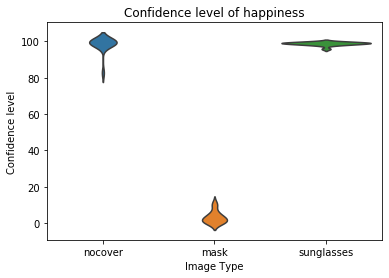

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.violinplot(x='image_type', y='confidence', data=df, inner = None)

# Decorate the axes
plt.xlabel('Image Type')
plt.ylabel('Confidence level')
plt.title('Confidence level of happiness')

We can see that Rekognition can identify happiness in the images with sunglasses as accurate as the images with no cover and even with smaller variance. However, it is hard for the machine to identify happiness in images with mask. This is for the happiness emotion specifically and may be different for other emotions. 

## Human Detection of Emotions
As mentioned in our Project Focus, we want to compare between humans and the machine, so we created a [survey](https://docs.google.com/forms/d/e/1FAIpQLSf_kLTRN6m8N3CGJCn8HP5Npx7iMpE9vrUJ0NfNATtd2RuxDQ/viewform?usp=sf_link) to gather people's detection of emotions using the same images we tested in Rekognition. The data are organized in the data frame below.

In [28]:
import pandas as pd
data = pd.read_csv("QTM350 Project Survey.csv")
data

,images,happy,sad,angry,confused,disgusted,surprised,calm,fear,human_correct_guess,machine_correct_guess
0,happy_mask,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,10.767
1,happy_sunglasses,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,99.053
2,sad_mask,0.0,60.0,2.2,20.0,13.3,0.0,0.0,4.4,60.0,0.536
3,sad_sunglasses,0.0,80.0,0.0,4.4,13.3,2.2,0.0,0.0,80.0,23.950
4,angry_mask,0.0,0.0,84.4,6.7,8.9,0.0,0.0,0.0,84.4,2.296
5,angry_sunglasses,0.0,2.2,71.1,4.4,13.3,NaN,4.4,4.4,71.1,81.323
6,confused_mask,0.0,0.0,0.0,84.4,15.6,0.0,0.0,0.0,84.4,0.784
7,confused_sunglasses,0.0,4.4,2.2,71.1,11.1,4.4,4.4,2.2,71.1,20.616
8,disgusted_mask,0.0,15.6,4.4,0.0,64.4,2.2,2.2,11.1,64.4,0.198
9,disgusted_sunglasses,0.0,0.0,0.0,2.2,75.6,11.1,0.0,11.1,75.6,31.381


In the survey, we used the 14 images above with mask and with sunglasses. The `happy` to `fear` columns record the percentage of responses for each image. The `human_correct_guess` column records the percentage of respondents who correctly identified the emotion in each image, and the `machine_correct_guess` column records the confidence level Rekognition returns for the correct emotion in each image. 

### Regression Analysis
Looking at the data, it is obvious that humans can detect emotions better than Rekognition from the images with mask and with sunglasses. However, how much better can humans detect those emotions? To answer this question, we can find a line of regression with 14 observations using the `human_correct_guess` column and the `machine_correct_guess` column. 

First, we show the 14 observations with a scatterplot. 

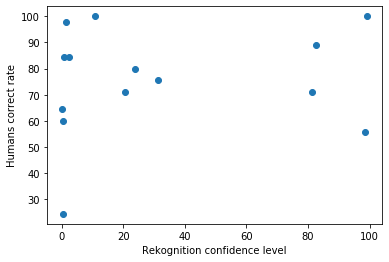

In [29]:
import matplotlib.pyplot as plt

human = data['human_correct_guess']
machine = data['machine_correct_guess']

plt.plot(machine, human, 'o')

plt.xlabel('Rekognition confidence level')
plt.ylabel('Humans correct rate')
plt.show()

We then run a regression of human_correct_guess on machine_correct guess and add the regression line to the graph. 

In [30]:
from stargazer.stargazer import Stargazer
import statsmodels.formula.api as smf
from IPython.core.display import HTML

res = smf.ols('human_correct_guess ~ machine_correct_guess', data = data).fit()
st = Stargazer([res])
HTML(st.render_html())

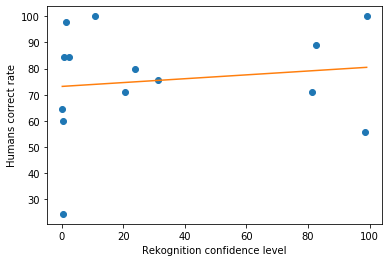

In [31]:
import numpy as np
xs = np.array([machine.min(), machine.max()])
ys = res.params['Intercept'] + res.params['machine_correct_guess']*xs

plt.plot(machine, human, 'o')
plt.plot(xs,ys)

plt.xlabel('Rekognition confidence level')
plt.ylabel('Humans correct rate')
plt.show()


From the regression plot, we can see that on average, people make more accurate guesses about the emotions than Rekognition for the given 14 images (73.16% better according to the regression result). However, there seems to be no correlation between the two variables, perhaps because people and the machine have systematically different ways in terms of emotion detection, which obviously, people do better. 

## Considerations of future research
There are a few areas regarding this research that are worth investigating further.  

First of all, all tests in this project are only done with a small number of images. For more valid results, we need to analyze more pictures using the same procedure.   

Moreover, we have found that images with mask are hard to identify for Rekognition, and the machines only returns some specific type of emotions for these images (in our test, Rekognition only returns fear and calm). Since the machine can only examine the eyes in images with mask, we assume the shape of the eyes may determine what Rekogtion returns. With preliminary analysis, we found that when the eyes are wide open, Rekogtion is likely to identify the emotion to be fear; when the eyes are narrowed, calm is likely to be returned. For further research, we could find more images with mask and test whether other emotions will also be returned.   

In our test results above, we also noted that the image of fear with mask actually has a higher confidence to be identified as fear than the image of fear without mask. Since covering the face with hands is a common reaction when people are in fear, we think Rekognition may be trained to label pictures with hands covering the lower part of face as fear, which is the reason it is more likely to identify images with mask to be fear. We did some simple tests below with images where the person covers his face with hands:

<img align="left" src="https://350-project-notebook.s3.amazonaws.com/fear4.jpg" width=250 height=500/>

In [32]:
fear_hand = client.detect_faces(Image = {'S3Object':{'Bucket':'350-project-notebook', 'Name':'fear4.jpg'}},
                    Attributes = ["ALL"])
fear_hand['FaceDetails'][0]['Emotions']

[{'Type': 'FEAR', 'Confidence': 96.50116729736328},
 {'Type': 'SURPRISED', 'Confidence': 2.862236738204956},
 {'Type': 'CONFUSED', 'Confidence': 0.15179575979709625},
 {'Type': 'HAPPY', 'Confidence': 0.14079956710338593},
 {'Type': 'ANGRY', 'Confidence': 0.11955226212739944},
 {'Type': 'DISGUSTED', 'Confidence': 0.085200235247612},
 {'Type': 'CALM', 'Confidence': 0.07678116112947464},
 {'Type': 'SAD', 'Confidence': 0.06246819347143173}]

For comparison, let's test another image with hands covering less of the face.   
<img align="left" src="https://350-project-notebook.s3.amazonaws.com/fear3.jpg" width=250 height=500/>

In [33]:
fear_hand2 = client.detect_faces(Image = {'S3Object':{'Bucket':'350-project-notebook', 'Name':'fear3.jpg'}},
                    Attributes = ["ALL"])
fear_hand2['FaceDetails'][0]['Emotions']

[{'Type': 'FEAR', 'Confidence': 98.36841583251953},
 {'Type': 'SURPRISED', 'Confidence': 1.133265733718872},
 {'Type': 'CONFUSED', 'Confidence': 0.20426036417484283},
 {'Type': 'SAD', 'Confidence': 0.07366611063480377},
 {'Type': 'ANGRY', 'Confidence': 0.07121500372886658},
 {'Type': 'HAPPY', 'Confidence': 0.062316592782735825},
 {'Type': 'CALM', 'Confidence': 0.05586646869778633},
 {'Type': 'DISGUSTED', 'Confidence': 0.0309959314763546}]

The machine again returns a high confidence to identify fear. This could be an interesting area to investigate. 

## Conclusion
In conclusion, by comparing the test results for uncoverd faces, faces with masks and faces with sunglasses, we can clearily see that the accurary for decting the emotions indeed vary a alot under different situations. Just as expected, AWS Rekognition can most accurately detecting emotions with no coverings, followed by pictures with sunglasses and then pictures with masks. This may suggest that AWS Rekognition depend more on the lower part of the face to detext emotions.

To further evaluate the accuracy of emotion detecting, we compared the results of human emotion detection and machine emotion detection. It turn out that humans are indeed 73.16% better at detecting emotions in general. The disparity of accuracy is greater especially when the face is covered with masks or sunglasses. This may due to the reason that people are better at finding the subtle changes in facial expressions.

For future researches, more pictures could be added and analyzed to test our conclusion. It is also worth investigating whether Rekognition detect fear based on the hand covering over mouth.


In [34]:
!jupyter nbconvert --to html QTM_350_Project.ipynb

[NbConvertApp] Converting notebook QTM_350_Project.ipynb to html
[NbConvertApp] Writing 958628 bytes to QTM_350_Project.html
